In [1]:
# sys, file and nav packages:
import os
import datetime as dt
import csv

# math packages:
import pandas as pd
import math
import numpy as np
import datetime as dt 

from scipy import stats
from scipy.stats import kendalltau, pearsonr, spearmanr
# from scipy.stats import gamma
# from scipy.stats import beta
# from scipy.stats import binom
# from scipy.stats import bernoulli

# import statsmodels.api as sm
# from statsmodels.graphics.gofplots import qqplot_2samples
# from statsmodels.distributions.empirical_distribution import ECDF

# charting:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker
import matplotlib.ticker as mtick
import seaborn as sns
# from matplotlib.gridspec import GridSpec
# from matplotlib import cm
# from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Colormap

# mapping
# import geopandas as gpd

# home brew utitilties
import resources.utilities.utility_functions as ut
import resources.utilities.abundance_classes as ac

# documenting
from IPython.display import display, Markdown, Latex, HTML


# returns the p_value for each test
def kendall_pval(x,y):
    return kendalltau(x,y)[1]

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]

# table kwargs
table_k = dict(loc="top left", bbox=(0,0,1,1), colWidths=[.5, .5], cellLoc='center')
tablecenter_k = dict(loc="top left", bbox=(0,0,1,1), cellLoc='center')
tabtickp_k = dict(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False)

# chart kwargs
title_k = {'loc':'left', 'pad':14, 'linespacing':1.5, 'fontsize':12}
title_k14 = {'loc':'left', 'pad':16, 'linespacing':1.5, 'fontsize':14}
xlab_k = {'labelpad':10, 'fontsize':12}
ylab_k = {'labelpad':14, 'fontsize':14}


# # use these to format date axis in charts
# weeks = mdates.WeekdayLocator(byweekday=1, interval=4)
# # onedayweek = mdates.DayLocator(bymonthday=1, interval=1)
# # everytwoweeks = mdates.WeekdayLocator(byweekday=1, interval=4)

# months = mdates.MonthLocator(bymonth=[3,6,9,12])
# bimonthly = mdates.MonthLocator(bymonth=[1,3,5,7,9,11])
# allmonths = mdates.MonthLocator()
# wks_fmt = mdates.DateFormatter('%d')
# mths_fmt = mdates.DateFormatter('%b')

# map marker size:
survey_data, location_data, code_defs, geo_data, output = ut.make_local_paths()

### Discussion: Frequency, and amplititude of the top ten most observed litter items rhine source, rhine end

bried description of why we are doing this


#### slr data, dutch data

brief description each project how the data was gathered

#### abundance - codes that are commom to both regions

discuss qauntities, pcs_m of the common codes in the top ten list

#### abundance - codes that are not commom to both regions

discuss qauntities, pcs_m of the codes that are not common in the top ten lists

#### frequency - how often a code is reported

dicuss the value of % found

#### magnitude of the observation

identify the elements that are a large percentage of what was identified and was identified frequently

### Conclusion



In [2]:
# set some parameters:
start_date = '2020-04-01'
end_date = '2021-04-01'

startyearmonth = '{}/{}'.format(start_date[5:7], start_date[:4])
endyearmonth = '{}/{}'.format(end_date[5:7], end_date[:4]) 

# decide which data to use
aggregated = False


# collect the names:
# group_names = list(these_groups.keys())

# choose a lake:
# lake = 'Lac Léman'
# coi = 'Neuchâtel'
# bassin_label = 'Aare'
# bassin = ['Aare', 'Aare|Nidau-Büren-Kanal','Schüss', 'Neuenburgersee', 'Thunersee','Bielersee', 'Brienzersee','La Thièle']
# bassin_lmn = ['Rhône', 'Lac Léman']
# samples_all = 'All samples'



# define a significant event:
sig = .9
one_minus_sig = (1-sig)

# define explanatory variables:
expv = ['population','streets','buildings','rivs']

# name the folder:
name_of_project = 'setup_class_methods'

# use this to store things:
project_directory = ut.make_project_folder(output, name_of_project)

# keep track of output
files_generated = []
figure_num = 0
data_num = 0

def add_output(**kwargs):
    files_generated.append({'tag':kwargs['tag'], 'number':kwargs['figure_num'], 'file':kwargs['file'],'type':kwargs['a_type']})
    if kwargs['a_type'] == 'data':
        kwargs['data'].to_csv(F"{kwargs['file']}.csv", index=False)
    else:
        plt.savefig(F"{kwargs['file']}.jpeg", dpi=300)

In [3]:
# get the data
dutch_surveys = pd.read_csv(F"{output}/harmonized_results/dutch_harmonized.csv")

dutch_beaches = pd.read_csv(F"{output}/harmonized_results/dutch_admin_h.csv")

dutch_codes = pd.read_csv(F"{code_defs}/new_dutch_codes.csv")


# the dutch codes set the start and end
start_date = dutch_surveys['date'].min()
end_date = '2017-12-31'

In [4]:
# use the aggregated hd data. This accounts for the custom codes used in Switzerland
swiss_surveys = pd.read_csv(survey_data+'/aggregated_hd_surveys.csv')

# these are the water features that drain to the Rhine:
water_names = ['Aare', 'Sihl', 'Reuss', 'Rhein', 'Limmat', 'Seez','Zurichsee','Quatre Cantons', 'Vorderrhein', 'Zugersee','Glatt', 'Goldach', 'Greifensee','Bodensee', 'Chriesbach', 'Emme', 'Neuenburgersee', 'Walensee' ]

months_of_surveys = [9,10,11,4,5,6]

dutch_water_names = []
# format the date and slice the data 
swiss_surveys['date'] = pd.to_datetime(swiss_surveys['date'], format='%Y-%m-%d')
swissDf = swiss_surveys[(swiss_surveys.date >= start_date)&(swiss_surveys.date <= end_date)].copy()

# location data
swiss_beaches = pd.read_csv(location_data+'/hammerdirt_beaches.csv')

# code data from switzerland
swiss_codes = pd.read_csv(F"{code_defs}/swiss_codes_keyed_ospar.csv")

### Harmonize data results for class methods

In [5]:
dutch_surveys['date'] = pd.to_datetime(dutch_surveys.date, format="%Y-%m-%d")

In [6]:
swiss_beaches.set_index('slug', inplace=True)

# assign the water feature type to each result

# make maps
lakes = swiss_beaches.loc[swiss_beaches.water == 'l'].index
rivers = swiss_beaches.loc[swiss_beaches.water == 'r'].index

# apply maps:
swissDf.loc[swissDf.location.isin(lakes), 'water'] = 'l'
swissDf.loc[swissDf.location.isin(rivers), 'water'] = 'r'

In [7]:
# key in the ospar id to the swiss surveys
swiss_codes.set_index('code', inplace=True)

# map that value
os_mlw_map = swiss_codes.ospar_id

# apply map
swissDf['ospar_id'] = swissDf.code.map(lambda x: os_mlw_map.loc[x] )

# swap the code values
swiss_surveys = swissDf[swissDf.water_name.isin(water_names)].drop('code', axis=1)
swiss_surveys.rename(columns={'ospar_id':'code'}, inplace=True)

# identify the swiss surveys as a group
swiss_surveys['region'] = 'CH'

In [8]:
swiss_surveys['month'] = swiss_surveys['date'].dt.month

In [9]:
print("\nThe columns should have common columns:\n\n")
print(F"The dutch survey columns:\n:{dutch_surveys.columns.to_numpy()}\n\n")
print(F"The swiss survey columns:\n:{swiss_surveys.columns.to_numpy()}\n\n")


The columns should have common columns:


The dutch survey columns:
:['location' 'date' 'loc_date' 'water_name' 'code' 'quantity' 'pcs_m']


The swiss survey columns:
:['loc_date' 'date' 'pcs_m' 'quantity' 'location' 'water_name' 'water'
 'code' 'region' 'month']




In [10]:
# key the ospar code value into the dutch surveys
current_codes = dutch_surveys.code.unique()

# make a column to store the new code
dutch_surveys['new_code'] = 0

# make a map
d_c_map = dutch_codes[['ID', 'parent_code']]
d_c_map.set_index('ID', drop=True, inplace=True)

# apply map
for a_code in current_codes:
    dutch_surveys.loc[dutch_surveys.code==a_code, 'new_code']= d_c_map.loc[a_code][0]

# swap out the columns
dutch_surveys.drop('code', inplace=True, axis=1)
dutch_surveys.rename(columns={'new_code':'code'}, inplace=True)

# identify the surveys as a whole
dutch_surveys['region'] ='NL'
dutch_surveys['water']='r'

In [11]:
surveys_all = pd.concat([swiss_surveys, dutch_surveys])
surveys_all['month'] = surveys_all.date.dt.month

In [12]:
print(F"\nThese are the results prior to applying geographic or temporal boundaries:\n\n{surveys_all.groupby('region').quantity.sum()}\n")

s_samps = swiss_surveys.loc_date.nunique()
d_samps = dutch_surveys.loc_date.nunique()

print(F"\nNumber of samples swiss surveys: {s_samps}, dutch survyes: {d_samps}")


These are the results prior to applying geographic or temporal boundaries:

region
CH     25534.0
NL    151006.0
Name: quantity, dtype: float64


Number of samples swiss surveys: 277, dutch survyes: 382


In [13]:
# these are the columns that the class method expects to see:
these_cols = ['loc_date', 'location', 'water_name','water', 'date','month', 'region']

a = ac.PreprocessData(surveys_all, dutch_beaches,these_cols=these_cols)

added exp vs


In [14]:
catchment_cols = ['region','water_name','water','loc_date', 'location', 'date', 'month']

clas_kwargs = dict(
#     code_group_data=group_names_locations,
#     new_code_group=frag_plas,
#     levels=levels,
#     catchment_features=bassin,
    end_date=end_date,
    start_date=start_date,
#     code_group_loc=output,
    catchment_cols=catchment_cols)


In [15]:
b = ac.CatchmentArea(a.processed, swiss_beaches, **clas_kwargs)

made code totals


### Geographic spread and frequency

In [16]:
# wfoams = ['G81', 'G82', 'G117']
# yfoams = ['G74', 'G73', 'G75']
# pand = ['G900', 'G901', 'G902']
# candy = ['G30']
# personal_hygiene = dfCodes.loc[dfCodes.source == 'Personal hygiene'].index.to_numpy()
# tobacco_codes = dfCodes.loc[dfCodes.source == 'Tobacco'].index.to_numpy()

# make a copy of the data to work with

# eliminate the OSPAR code 117, these objects were not counted in Switzerland 2017
som_data = b.bassin_data[b.bassin_data.code != 117].copy()

# use only the data that was gathered in the following months
som_data = som_data.loc[som_data.month.isin(months_of_surveys)]

data_num+=1
# 'tag':kwargs['tag'], 'number':kwargs['figure_num'], 'file':kwargs['file'],'type':kwargs['a_type']
a_tag = 'data used for all calculations'

file = F"{project_directory}/all_data_used.csv"
a_type='data'

add_output(tag=a_tag, figure_num=data_num, a_type=a_type, file=file, data=som_data)

In [17]:
print(F"\nThe data is limited to all samples on or after {start_date} and up to {end_date} for the following months:\n{months_of_surveys}")

number_of_samples = len(som_data.loc_date.unique())
number_of_locations = len(som_data.location.unique())
number_of_objects = som_data.quantity.sum()
number_of_features = len(som_data.water_name.unique())
print(F"The number of samples, number of locations, the total number of objects and the number of features:\n\n1. number of samples: {number_of_samples}\n2. number of locations: {number_of_locations}\n3. number of objects: {number_of_objects}\n4. number of features: {number_of_features}\n")

num_samples_country = som_data.groupby('region').loc_date.nunique()
q_per_country = som_data.groupby('region').quantity.sum()

print(F"\nThe number of samples per country:\n\n{num_samples_country}\n")
print(F"\nThe number of objects identified per country:\n\n{q_per_country}\n")
# print(num_samples_country)



The data is limited to all samples on or after 2017-07-04 and up to 2017-12-31 for the following months:
[9, 10, 11, 4, 5, 6]
The number of samples, number of locations, the total number of objects and the number of features:

1. number of samples: 243
2. number of locations: 141
3. number of objects: 24023.0
4. number of features: 20


The number of samples per country:

region
CH    138
NL    105
Name: loc_date, dtype: int64


The number of objects identified per country:

region
CH     9924.0
NL    14099.0
Name: quantity, dtype: float64



In [18]:
print(F"There are {len(som_data.water_name.unique())} different water features:\n\n{som_data.groupby('region').water_name.unique().to_numpy()}")

There are 20 different water features:

[array(['Aare', 'Bodensee', 'Chriesbach', 'Emme', 'Glatt', 'Goldach',
       'Greifensee', 'Limmat', 'Neuenburgersee', 'Reuss', 'Rhein', 'Sihl',
       'Quatre Cantons', 'Vorderrhein', 'Walensee', 'Zurichsee',
       'Zugersee'], dtype=object)
 array(['Waal', 'Maas', 'Nederrijn'], dtype=object)]


In [19]:
# the number of locations by feature
num_loc_feature = som_data.groupby('water_name', as_index=False).location.nunique()
num_loc_feature_d = som_data.groupby('water_name', as_index=False).agg({'location':'nunique', 'loc_date':'nunique'})
num_loc_feature_d.rename(columns={'location':'# of locations', 'loc_date':'# of samples'}, inplace=True)
print(F"The number of locations and the number of samples per location:\n\n{num_loc_feature_d.set_index('water_name')}")

The number of locations and the number of samples per location:

                # of locations  # of samples
water_name                                  
Aare                         9            24
Bodensee                     3             8
Chriesbach                   1             3
Emme                         3             6
Glatt                        1             1
Goldach                      1             2
Greifensee                   3             5
Limmat                       5            14
Maas                        50            54
Nederrijn                    1             1
Neuenburgersee               1             2
Quatre Cantons               3             9
Reuss                        3             7
Rhein                        5            14
Sihl                         6            12
Vorderrhein                  1             3
Waal                        34            50
Walensee                     1             2
Zugersee                     2     

In [20]:
som_data['fail'] = som_data.quantity > 0

In [21]:

dutch_top_ten = som_data[som_data.region == 'NL'].groupby(['code'], as_index=False).quantity.sum().sort_values(by='quantity',ascending=False)
dutch_total = dutch_top_ten.quantity.sum()
dutch_top_ten['% of total'] = dutch_top_ten.quantity/dutch_total


swiss_top_ten = som_data[som_data.region == 'CH'].groupby(['code'], as_index=False).quantity.sum().sort_values(by='quantity',ascending=False)
swiss_total = swiss_top_ten.quantity.sum()
swiss_top_ten['% of total'] = swiss_top_ten.quantity/swiss_total

print(F"\nThe swiss top ten:\n\n{swiss_top_ten.sort_values(by='quantity', ascending=False)[:10]}\n")


The swiss top ten:

    code  quantity  % of total
51    64    3289.0    0.331419
36    46    1046.0    0.105401
75    93     763.0    0.076884
16    19     597.0    0.060157
53    67     527.0    0.053104
62    77     367.0    0.036981
31    40     313.0    0.031540
71    89     304.0    0.030633
38    48     251.0    0.025292
46    59     233.0    0.023478



In [22]:
print(F"\nThe dutch top ten:\n\n{dutch_top_ten.sort_values(by='quantity', ascending=False)[:10]}\n")


The dutch top ten:

    code  quantity  % of total
34    46    2925.0    0.207462
17    19    1225.0    0.086886
48    64     794.0    0.056316
60    78     770.0    0.054614
13    15     663.0    0.047025
24    32     518.0    0.036740
3      4     491.0    0.034825
36    48     459.0    0.032556
43    59     442.0    0.031350
73    93     434.0    0.030782



In [23]:
dtt_c = dutch_top_ten[:10].code.values


stt_c = swiss_top_ten[:10].code.values


# the top ten for each region
coi_d = dutch_top_ten[dutch_top_ten.code.isin(dtt_c)]
coi_s = swiss_top_ten[swiss_top_ten.code.isin(stt_c)]

# the combined top ten
combined = list(set(stt_c)|set(dtt_c))

print(F"\nThese are the codes that are in both top ten lists:\n\n{combined}\n")


These are the codes that are in both top ten lists:

[64, 67, 4, 77, 78, 15, 19, 89, 93, 32, 40, 46, 48, 59]



In [24]:
coi_all = som_data[som_data.code.isin(combined)].copy()

# group all the records by loc_date and code
coi_all = coi_all.groupby(['loc_date','region','water', 'water_name', 'location', 'code'], as_index=False).agg({'quantity':'sum', 'pcs_m':'sum'})

In [25]:
a_key = dutch_codes[['parent_code', 'description']].drop_duplicates('parent_code', keep='first').set_index('parent_code', drop=True)

print(F"\nThese are the code definitions:\n\n{a_key.loc[combined]}\n")



These are the code definitions:

                          description
parent_code                          
64                   Cigarette filter
67                        Other paper
4                   Bottle (>= 0.5 L)
77                   Metal bottle cap
78                          Drink can
15                      Caps and lids
19                      Food wrapping
89              Other metal (< 50 cm)
93                        Other glass
32                               Rope
40               Industrial packaging
46           Hard fragment  (>= 5 cm)
48                      Other plastic
59                      Other textile



In [26]:
def add_new_label(ax_get_labels, key):
    return [key.loc[int(x.get_text())][0] for x in ax_get_labels]
coi_all['description'] = coi_all.code.map(lambda x:a_key.loc[4][0])    

In [27]:
# mark all results that are greater than zero as fail = true:
coi_all['fail'] = coi_all.quantity > 0


# get the average value for pcs_m, the sum of quantity and fail, and the count of loc_date for each code
coi_wt = coi_all.groupby(['water_name', 'code', 'description'], as_index=False).agg({'quantity':'sum', 'pcs_m':'mean', 'fail':'sum', 'loc_date':'count'})
coi_lr = coi_all.groupby(['water', 'code', 'description'], as_index=False).agg({'quantity':'sum', 'pcs_m':'mean', 'fail':'sum', 'loc_date':'count'})
coi_at = coi_all.groupby(['region',  'code', 'description'], as_index=False).agg({'quantity':'sum', 'pcs_m':'mean', 'fail':'sum', 'loc_date':'count'})

# get the quantity as a % of the total
for a_region in coi_at.region.unique():
    coi_at.loc[coi_at.region==a_region, '% of total'] = coi_at.quantity/coi_at[coi_at.region==a_region].quantity.sum()
for a_name in coi_wt.water_name.unique():
    coi_wt.loc[coi_wt.water_name==a_name, '% of total'] = coi_wt.quantity/coi_wt[coi_wt.water_name==a_name].quantity.sum()
for a_name in coi_lr.water.unique():
    coi_lr.loc[coi_lr.water==a_name, '% of total'] = coi_lr.quantity/coi_lr[coi_lr.water==a_name].quantity.sum()


# get the rate at which the oobject was found
for a_region in coi_at.region.unique():
    coi_at.loc[coi_at.region==a_region, '% found'] = coi_at.fail/coi_at[coi_at.region==a_region].loc_date
for a_name in coi_wt.water_name.unique():
    coi_wt.loc[coi_wt.water_name==a_name, '% found'] = coi_wt.fail/coi_wt[coi_wt.water_name==a_name].loc_date
for a_name in coi_lr.water.unique():
    coi_lr.loc[coi_lr.water==a_name, '% found'] = coi_lr.fail/coi_lr[coi_lr.water==a_name].loc_date

    # the product of % of total * % found
coi_at['magnitude'] = coi_at['% found']*coi_at['% of total']
coi_wt['magnitude'] = coi_wt['% found']*coi_wt['% of total']
coi_lr['magnitude'] = coi_lr['% found']*coi_lr['% of total']

In [28]:
# just the rivers
coi_just_rivers = coi_all[coi_all.water == 'r'].copy()
coi_jr_regio = coi_just_rivers.groupby(['region',  'code'], as_index=False).agg({'quantity':'sum', 'pcs_m':'mean', 'fail':'sum', 'loc_date':'count'})
coi_jr = coi_just_rivers.groupby(['water_name', 'code'], as_index=False).agg({'quantity':'sum', 'pcs_m':'mean', 'fail':'sum', 'loc_date':'count'})

for a_region in coi_jr_regio.region.unique():
    coi_jr_regio.loc[coi_jr_regio.region==a_region, '% of total'] = coi_jr_regio.quantity/coi_jr_regio[coi_jr_regio.region==a_region].quantity.sum()
for a_name in coi_jr.water_name.unique():
    coi_jr.loc[coi_jr.water_name==a_name, '% of total'] = coi_jr.quantity/coi_jr[coi_jr.water_name==a_name].quantity.sum()
# coi_jr_regio['% of total'] = coi_jr_regio.quantity/coi_jr_regio.quantity.sum()
# coi_jr['% of total'] = coi_jr.quantity/coi_jr.quantity.sum()

# get the rate at which the oobject was found

for a_region in coi_jr_regio.region.unique():
    coi_jr_regio.loc[coi_jr_regio.region==a_region, '% found'] = coi_jr_regio.fail/coi_jr_regio[coi_jr_regio.region==a_region].loc_date
for a_name in coi_jr.water_name.unique():
    coi_jr.loc[coi_jr.water_name==a_name, '% found'] = coi_jr.fail/coi_jr[coi_jr.water_name==a_name].loc_date
# coi_jr_regio['% found'] = coi_jr_regio.fail/coi_jr_regio.loc_date
# coi_jr['% found'] = coi_jr.fail/coi_jr.loc_date

# the product of % of total * % found
coi_jr_regio['magnitude'] = coi_jr_regio['% found']*coi_jr_regio['% of total']
coi_jr['magnitude'] = coi_jr['% found']*coi_jr['% of total']



Results grouped by country:




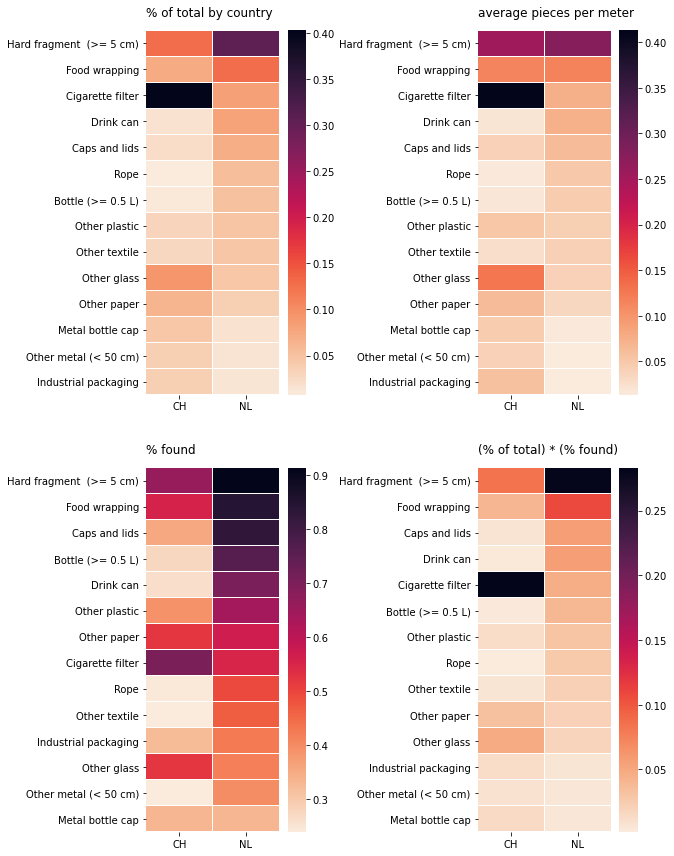

In [29]:
print("\nResults grouped by country:\n\n")

fig, axs = plt.subplots(2,2, figsize=(10,12))

heat_map_data = coi_at[['region', 'code', '% of total']].pivot(index='code', columns='region')
heat_map_data.columns = heat_map_data.columns.get_level_values(1)
heat_map_data = heat_map_data.sort_values(by='NL', ascending=False )
sns.heatmap(data=heat_map_data, cmap='rocket_r', linewidth=.1, ax=axs[0,0])
axs[0,0].tick_params(axis='y', labelrotation=0)
# axs[0,0].set_yticklabels(add_new_label(axs[0,0].get_yticklabels(), a_key))
axs[0,0].set_ylabel("", **ylab_k)
axs[0,0].set_xlabel("")
axs[0,0].set_title("% of total by country", **title_k)

heat_map_data = coi_at[['region', 'code', 'pcs_m']].pivot(index='code', columns='region')
heat_map_data.columns = heat_map_data.columns.get_level_values(1)
heat_map_data = heat_map_data.sort_values(by='NL', ascending=False )
sns.heatmap(data=heat_map_data, cmap='rocket_r', linewidth=.1, ax=axs[0,1])
axs[0,1].tick_params(axis='y', labelrotation=0)
axs[0,1].set_ylabel("", **ylab_k)
axs[0,1].set_xlabel("")
axs[0,1].set_title("average pieces per meter", **title_k)

heat_map_data = coi_at[['region', 'code', '% found']].pivot(index='code', columns='region')
heat_map_data.columns = heat_map_data.columns.get_level_values(1)
heat_map_data = heat_map_data.sort_values(by='NL', ascending=False )
sns.heatmap(data=heat_map_data, cmap='rocket_r', linewidth=.1, ax=axs[1,0])
axs[1,0].tick_params(axis='y', labelrotation=0)
axs[1,0].set_ylabel("", **ylab_k)
axs[1,0].set_xlabel("")
axs[1,0].set_title("% found", **title_k)

heat_map_data = coi_at[['region', 'code', 'magnitude']].pivot(index='code', columns='region')
heat_map_data.columns = heat_map_data.columns.get_level_values(1)
heat_map_data = heat_map_data.sort_values(by='NL', ascending=False )
sns.heatmap(data=heat_map_data, cmap='rocket_r', linewidth=.1, ax=axs[1,1])
axs[1,1].tick_params(axis='y', labelrotation=0)
axs[1,1].set_ylabel("", **ylab_k)
axs[1,1].set_xlabel("")
axs[1,1].set_title("(% of total) * (% found)", **title_k)

axs[0,0].set_yticklabels(add_new_label(axs[0,0].get_yticklabels(), a_key))
axs[0,1].set_yticklabels(add_new_label(axs[0,1].get_yticklabels(), a_key))
axs[1,0].set_yticklabels(add_new_label(axs[1,0].get_yticklabels(), a_key))
axs[1,1].set_yticklabels(add_new_label(axs[1,1].get_yticklabels(), a_key))

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.5, hspace=.5)

plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=.9, top=None, wspace=.99, hspace=.2)
file_name = F"{project_directory}/combined_top_ten_country.jpg"
plt.savefig(file_name, dpi=300)

plt.show()
plt.close()


Results grouped by lake or river both countries:




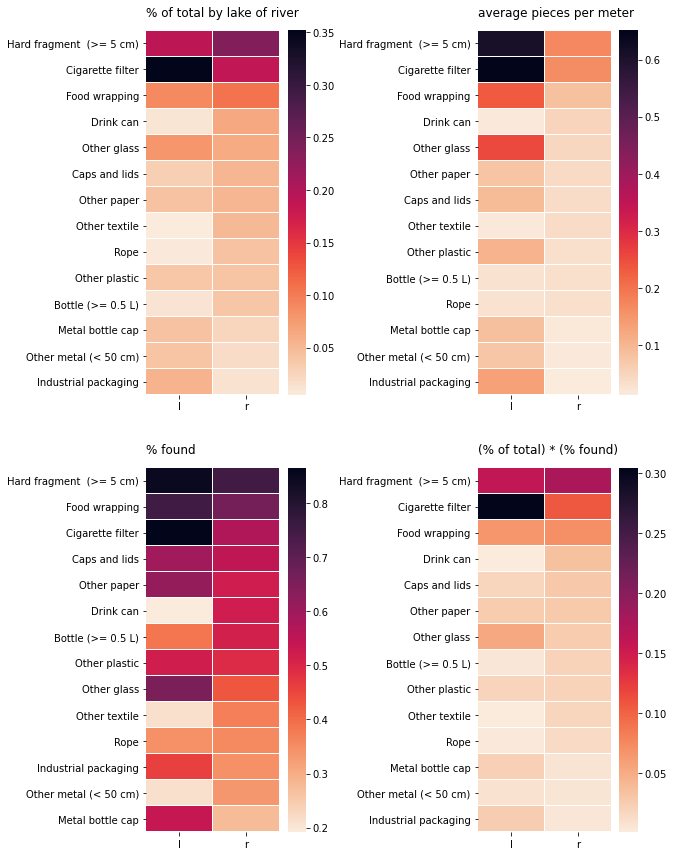

In [30]:
print("\nResults grouped by lake or river both countries:\n\n")

fig, axs = plt.subplots(2,2, figsize=(10,12))

heat_map_data = coi_lr[['water', 'code', '% of total']].pivot(index='code', columns='water')
heat_map_data.columns = heat_map_data.columns.get_level_values(1)
heat_map_data = heat_map_data.sort_values(by='r', ascending=False )
sns.heatmap(data=heat_map_data, cmap='rocket_r', linewidth=.1, ax=axs[0,0])
axs[0,0].tick_params(axis='y', labelrotation=0)
axs[0,0].set_ylabel("", **ylab_k)
axs[0,0].set_xlabel("")
axs[0,0].set_title("% of total by lake of river", **title_k)

heat_map_data = coi_lr[['water', 'code', 'pcs_m']].pivot(index='code', columns='water')
heat_map_data.columns = heat_map_data.columns.get_level_values(1)
heat_map_data = heat_map_data.sort_values(by='r', ascending=False )
sns.heatmap(data=heat_map_data, cmap='rocket_r', linewidth=.1, ax=axs[0,1])
axs[0,1].tick_params(axis='y', labelrotation=0)
axs[0,1].set_ylabel("", **ylab_k)
axs[0,1].set_xlabel("")
axs[0,1].set_title("average pieces per meter", **title_k)

heat_map_data = coi_lr[['water', 'code', '% found']].pivot(index='code', columns='water')
heat_map_data.columns = heat_map_data.columns.get_level_values(1)
heat_map_data = heat_map_data.sort_values(by='r', ascending=False )
sns.heatmap(data=heat_map_data, cmap='rocket_r', linewidth=.1, ax=axs[1,0])
axs[1,0].tick_params(axis='y', labelrotation=0)
axs[1,0].set_ylabel("", **ylab_k)
axs[1,0].set_xlabel("")
axs[1,0].set_title("% found", **title_k)

heat_map_data = coi_lr[['water', 'code', 'magnitude']].pivot(index='code', columns='water')
heat_map_data.columns = heat_map_data.columns.get_level_values(1)
heat_map_data = heat_map_data.sort_values(by='r', ascending=False )
sns.heatmap(data=heat_map_data, cmap='rocket_r', linewidth=.1, ax=axs[1,1])
axs[1,1].tick_params(axis='y', labelrotation=0)
axs[1,1].set_ylabel("", **ylab_k)
axs[1,1].set_xlabel("")
axs[1,1].set_title("(% of total) * (% found)", **title_k)

axs[0,0].set_yticklabels(add_new_label(axs[0,0].get_yticklabels(), a_key))
axs[0,1].set_yticklabels(add_new_label(axs[0,1].get_yticklabels(), a_key))
axs[1,0].set_yticklabels(add_new_label(axs[1,0].get_yticklabels(), a_key))
axs[1,1].set_yticklabels(add_new_label(axs[1,1].get_yticklabels(), a_key))

plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=.9, top=None, wspace=.99, hspace=.2)
file_name = F"{project_directory}/combined_top_ten_lake_river.jpg"
plt.savefig(file_name, dpi=300)

plt.show()
plt.close()


Swiss rivers versus dutch rivers:




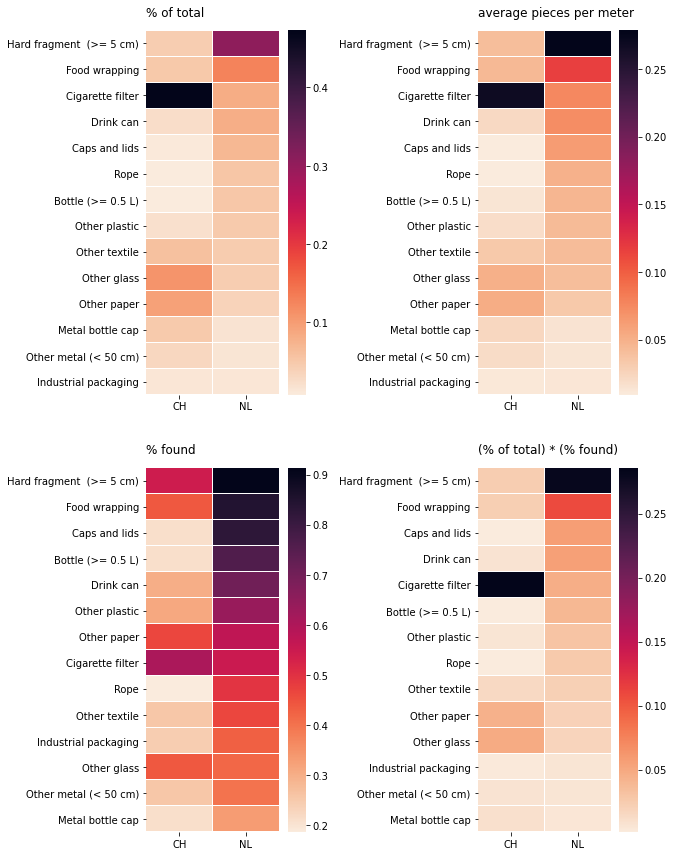

In [31]:
print("\nSwiss rivers versus dutch rivers:\n\n")

fig, axs = plt.subplots(2,2, figsize=(10,12))

heat_map_data = coi_jr_regio[['region', 'code', '% of total']].pivot(index='code', columns='region')
heat_map_data.columns = heat_map_data.columns.get_level_values(1)
heat_map_data = heat_map_data.sort_values(by='NL', ascending=False )
sns.heatmap(data=heat_map_data, cmap='rocket_r', linewidth=.1, ax=axs[0,0])
axs[0,0].tick_params(axis='y', labelrotation=0)
axs[0,0].set_ylabel("", **ylab_k)
axs[0,0].set_xlabel("")
axs[0,0].set_title("% of total ", **title_k)

heat_map_data = coi_jr_regio[['region', 'code', 'pcs_m']].pivot(index='code', columns='region')
heat_map_data.columns = heat_map_data.columns.get_level_values(1)
heat_map_data = heat_map_data.sort_values(by='NL', ascending=False )
sns.heatmap(data=heat_map_data, cmap='rocket_r', linewidth=.1, ax=axs[0,1])
axs[0,1].tick_params(axis='y', labelrotation=0)
axs[0,1].set_ylabel("", **ylab_k)
axs[0,1].set_xlabel("")
axs[0,1].set_title("average pieces per meter", **title_k)

heat_map_data = coi_jr_regio[['region', 'code', '% found']].pivot(index='code', columns='region')
heat_map_data.columns = heat_map_data.columns.get_level_values(1)
heat_map_data = heat_map_data.sort_values(by='NL', ascending=False )
sns.heatmap(data=heat_map_data, cmap='rocket_r', linewidth=.1, ax=axs[1,0])
axs[1,0].tick_params(axis='y', labelrotation=0)
axs[1,0].set_ylabel("", **ylab_k)
axs[1,0].set_xlabel("")
axs[1,0].set_title("% found", **title_k)

heat_map_data = coi_jr_regio[['region', 'code', 'magnitude']].pivot(index='code', columns='region')
heat_map_data.columns = heat_map_data.columns.get_level_values(1)
heat_map_data = heat_map_data.sort_values(by='NL', ascending=False )
sns.heatmap(data=heat_map_data, cmap='rocket_r', linewidth=.1, ax=axs[1,1])
axs[1,1].tick_params(axis='y', labelrotation=0)
axs[1,1].set_ylabel("", **ylab_k)
axs[1,1].set_xlabel("")
axs[1,1].set_title("(% of total) * (% found)", **title_k)

axs[0,0].set_yticklabels(add_new_label(axs[0,0].get_yticklabels(), a_key))
axs[0,1].set_yticklabels(add_new_label(axs[0,1].get_yticklabels(), a_key))
axs[1,0].set_yticklabels(add_new_label(axs[1,0].get_yticklabels(), a_key))
axs[1,1].set_yticklabels(add_new_label(axs[1,1].get_yticklabels(), a_key))

plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=.9, top=None, wspace=.99, hspace=.2)
file_name = F"{project_directory}/combined_swiss_vs_dutch.jpg"
plt.savefig(file_name, dpi=300)

plt.show()
plt.close()


% of total by water feature:




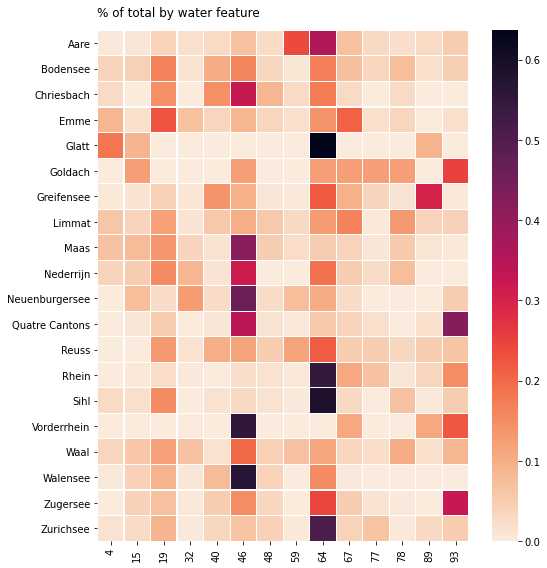

In [32]:
print("\n% of total by water feature:\n\n")

fig, axs = plt.subplots(figsize=(8,8))

heat_map_data = coi_wt[['water_name', 'code', '% of total']].pivot(index='water_name', columns='code')


sns.heatmap(data=heat_map_data, cmap='rocket_r', ax=axs, linewidth=.1)
axs.tick_params(axis='y', labelrotation=0)
axs.set_ylabel("", **ylab_k)
axs.set_xlabel("")
axs.set_title("% of total by water feature", **title_k)
labels = axs.get_xticklabels()
labels = [x.get_text().split('-')[-1] for x in labels]
axs.set_xticklabels(labels)

plt.tight_layout()
file_name = F"{project_directory}/top_ten_percent_feature.jpg"
plt.savefig(file_name, dpi=300)
plt.show()
plt.close()


average pieces per meter by water feature:




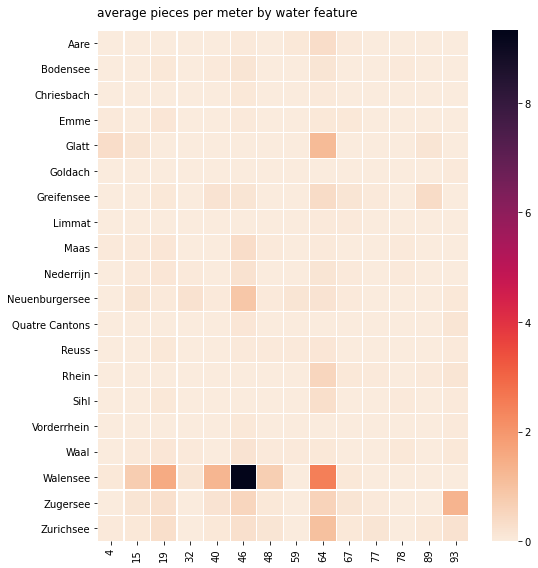

In [33]:
print("\naverage pieces per meter by water feature:\n\n")

fig, axs = plt.subplots(figsize=(8,8))

heat_map_data = coi_wt[['water_name', 'code', 'pcs_m']].pivot(index='water_name', columns='code')


sns.heatmap(data=heat_map_data, cmap='rocket_r', linewidth=.1, ax=axs)
axs.tick_params(axis='y', labelrotation=0)
axs.set_ylabel("", **ylab_k)
axs.set_xlabel("")
axs.set_title("average pieces per meter by water feature", **title_k)
labels = axs.get_xticklabels()
labels = [x.get_text().split('-')[-1] for x in labels]
axs.set_xticklabels(labels)

plt.tight_layout()
file_name = F"{project_directory}/top_ten_pcsm_feature.jpg"
plt.savefig(file_name, dpi=300)
plt.show()
plt.close()


% of surveys where at least one was found:




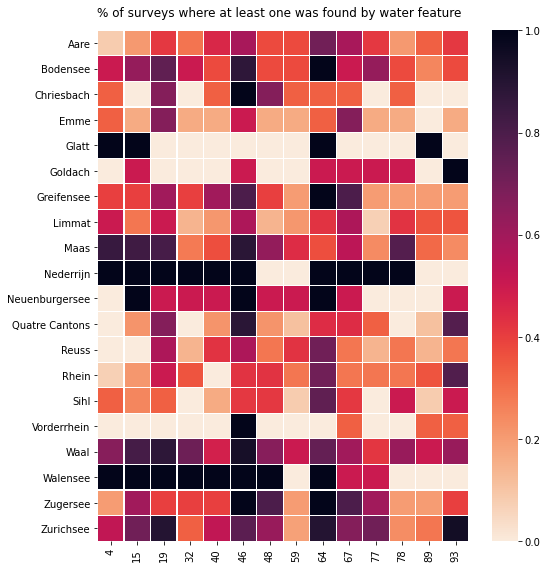

In [34]:
print("\n% of surveys where at least one was found:\n\n")

fig, axs = plt.subplots(figsize=(8,8))

heat_map_data = coi_wt[['water_name', 'code', '% found']].pivot(index='water_name', columns='code')


sns.heatmap(data=heat_map_data, cmap='rocket_r',linewidth=.1, ax=axs)
axs.tick_params(axis='y', labelrotation=0)
axs.set_ylabel("", **ylab_k)
axs.set_xlabel("")
axs.set_title("% of surveys where at least one was found by water feature", **title_k)
labels = axs.get_xticklabels()
labels = [x.get_text().split('-')[-1] for x in labels]
axs.set_xticklabels(labels)

plt.tight_layout()
file_name = F"{project_directory}/more_than_one_found_survey.jpg"
plt.savefig(file_name, dpi=300)
plt.show()
plt.close()


% of magnitude:




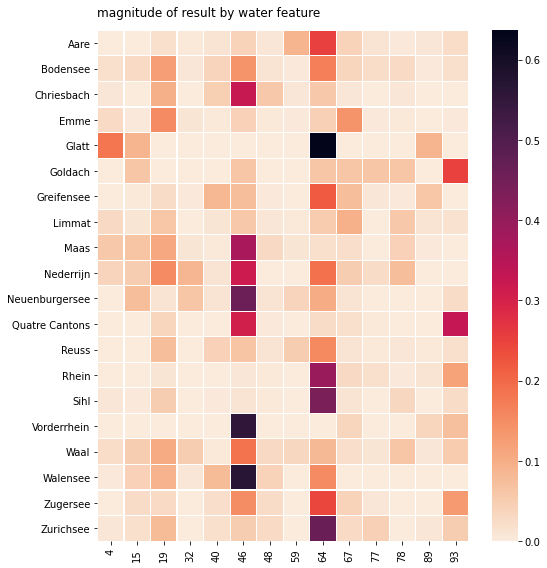

In [35]:
print("\n% of magnitude:\n\n")

fig, axs = plt.subplots(figsize=(8,8))

heat_map_data = coi_wt[['water_name', 'code', 'magnitude']].pivot(index='water_name', columns='code')


sns.heatmap(data=heat_map_data, cmap='rocket_r',linewidth=.1, ax=axs)
axs.tick_params(axis='y', labelrotation=0)
axs.set_ylabel("", **ylab_k)
axs.set_xlabel("")
axs.set_title("magnitude of result by water feature", **title_k)
labels = axs.get_xticklabels()
labels = [x.get_text().split('-')[-1] for x in labels]
axs.set_xticklabels(labels)

plt.tight_layout()
file_name = F"{project_directory}/features_magnitude.jpg"
plt.savefig(file_name, dpi=300)
plt.show()
plt.close()

### Abundance: number of objects and percent of total

In [36]:
print("The files generated by this workbook:\n")
files_generated

The files generated by this workbook:



[{'tag': 'data used for all calculations',
  'number': 1,
  'file': 'output/setup_class_methods/all_data_used.csv',
  'type': 'data'}]

#### Hopefully that just worked for you

if not contact analyst@hammerdirt.ch